In [1]:
import gymnasium as gym
import os
import torch
import pandas as pd
os.chdir('..')
import RL
from RL.algorithm.rlfuse_ppo import Rlfuse_ppo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

wifi_df = pd.read_csv('../Services/data/raw.csv')
cam_df = pd.read_csv('../Services/data/cam_raw.csv')
imu_df = pd.read_csv('../Services/data/imu_raw.csv')


env = gym.make('RL/RLfuse-v0')
env.load_data(wifi_df, cam_df, imu_df)

Using cache found in C:\Users\liuxi/.cache\torch\hub\huggingface_pytorch-transformers_main
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (50, 20)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (50, 6)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:22: UserWarning: WARN: It seems a Box observation space 

In [14]:
CUR_IDX = 100
agent_eval = Rlfuse_ppo(env, load_weight=True)
obs, info = env.get_evaluate_obs(CUR_IDX)
action = agent_eval.evaluate_action(obs)
action_idx, reward = env.evaluate_action(action)
wifi_names = obs[0]
wifi_rssis = obs[1]
imu_vis = obs[2]

data = []
for names_row, rssi_row in zip(wifi_names, wifi_rssis):
    row_dict = {}
    for name, rssi in zip(names_row, rssi_row):
        row_dict[name] = rssi
    data.append(row_dict)

In [15]:
info["label"]

[['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_1',
  'BP_AI_C_0',
  'BP_TargetAI_C_0',
  'BP_AI_C_2',
  'BP_AI_C_3',
  'BP_AI_C_5',
  'BP_AI_C_6',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_

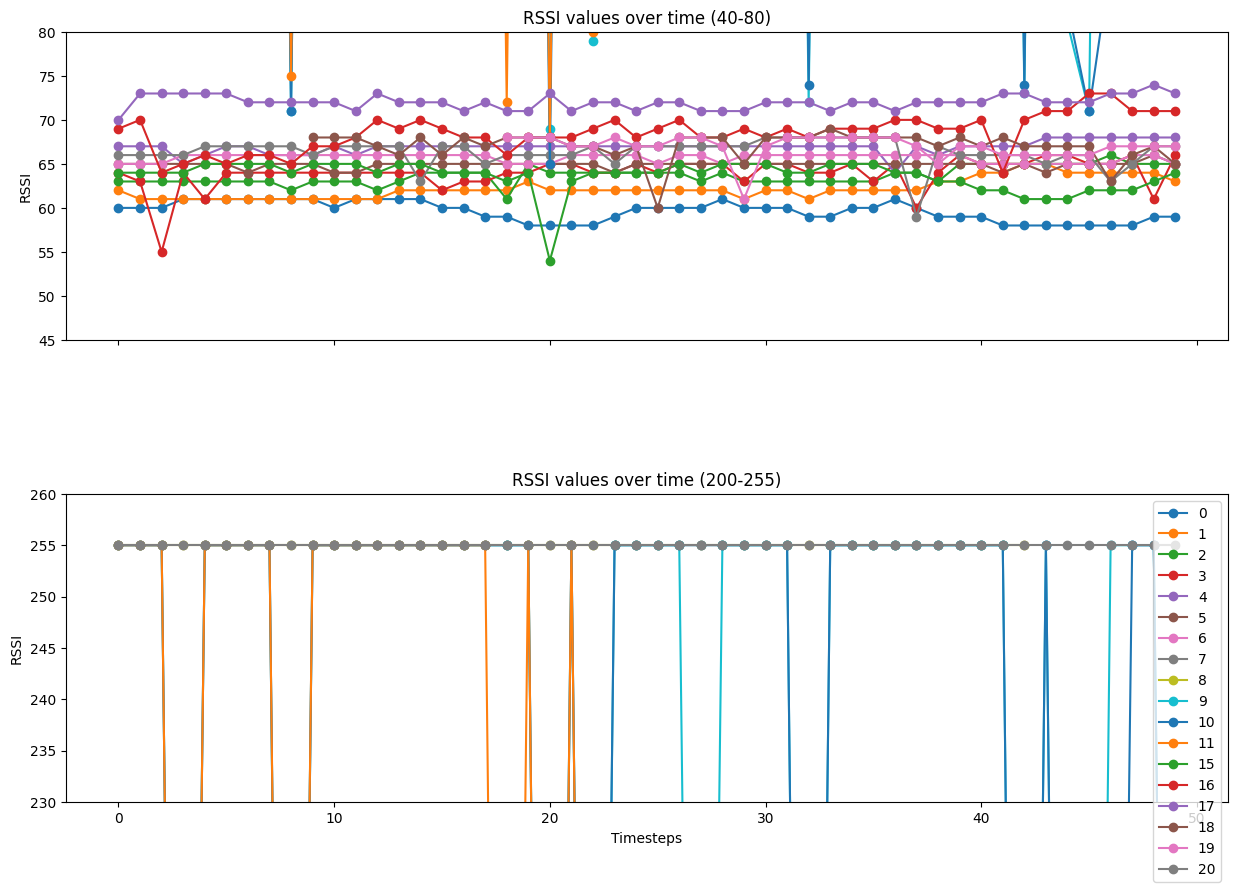

In [6]:
def plot_rssi(data, timesteps):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    fig.subplots_adjust(hspace=0.5)  # Add space between subplots
    plt.xlabel("Timesteps")

    ax1.set_ylabel("RSSI")
    ax1.set_ylim(45, 80)
    ax1.set_title("RSSI values over time (40-80)")

    ax2.set_ylabel("RSSI")
    ax2.set_ylim(230, 260)
    ax2.set_title("RSSI values over time (200-255)")

    all_names = sorted(set().union(*data))  # Get all unique names from the data

    for name in all_names:
        rssi_values = []
        for timestep in range(timesteps):
            rssi_values.append(data[timestep].get(name, None))

        ax1.plot(range(timesteps), rssi_values, marker='o', label=name)
        ax2.plot(range(timesteps), rssi_values, marker='o', label=name)

    # ax1.legend()
    ax2.legend()
    plt.show()

plot_rssi(data, 50)

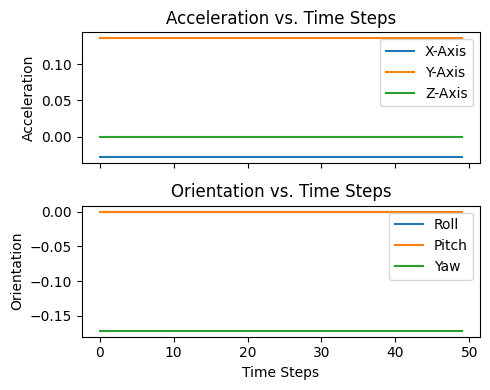

In [7]:
ax, ay, az, roll, pitch, yaw = imu_vis.T

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

# Acceleration
ax1.plot(ax, label='X-Axis')
ax1.plot(ay, label='Y-Axis')
ax1.plot(az, label='Z-Axis')
ax1.set_ylabel('Acceleration')
ax1.set_title('Acceleration vs. Time Steps')
ax1.legend()

# Orientation
ax2.plot(roll, label='Roll')
ax2.plot(pitch, label='Pitch')
ax2.plot(yaw, label='Yaw')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Orientation')
ax2.set_title('Orientation vs. Time Steps')
ax2.legend()

fig.tight_layout()
plt.show()

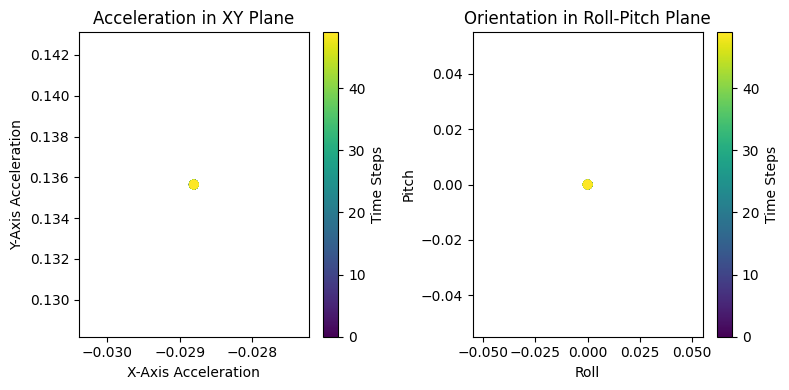

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Acceleration
scatter1 = ax1.scatter(ax, ay, c=np.arange(len(ax)), cmap='viridis')
ax1.set_xlabel('X-Axis Acceleration')
ax1.set_ylabel('Y-Axis Acceleration')
ax1.set_title('Acceleration in XY Plane')
fig.colorbar(scatter1, ax=ax1).set_label('Time Steps')

# Orientation
scatter2 = ax2.scatter(roll, pitch, c=np.arange(len(roll)), cmap='viridis')
ax2.set_xlabel('Roll')
ax2.set_ylabel('Pitch')
ax2.set_title('Orientation in Roll-Pitch Plane')
fig.colorbar(scatter2, ax=ax2).set_label('Time Steps')

fig.tight_layout()
plt.show()

In [16]:
action_idx

[8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

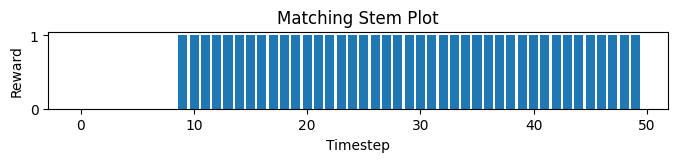

In [17]:
plt.figure(figsize=(8, 1))
plt.bar(np.arange(len(reward)), reward)
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.title('Matching Stem Plot')
plt.show()

In [10]:
sum(reward)

41